# Material Lifespan Prediction

## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

# Problem Statement
This dataset contains simulated data for predicting the lifespan (in hours) of materials used in industrial components. It includes a variety of features related to material composition, manufacturing processes, and structural defects. The dataset is ideal for exploring regression techniques, feature engineering, and material sciences applications.

# Data Collection
Dataset Source - https://www.kaggle.com/datasets/aounraza/material-lifespan-prediction-dataset/data

The data consists of 16 column and 1000 rows.

## Import Data and Required Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv(r'data\Material_Lifespan_Dataset.csv')
dataset.head()

,PredictedHours,ComponentType,StructureType,CoolRate,QuenchDuration,ForgeDuration,HeatProcessTime,NickelComposition,IronComposition,CobaltComposition,ChromiumComposition,MinorDefects,MajorDefects,EdgeDefects,InitialPosition,FormationMethod
0,1461.797,Nozzle,equiGrain,12.836,3.803,6.515,47.005,65.450,16.618,16.510,0.938,10,0,0,Bottom,Die
1,1825.977,Block,singleGrain,19.032,2.593,3.521,45.246,54.162,34.916,6.063,4.292,19,0,0,Bottom,Investment
2,707.101,Blade,equiGrain,28.418,0.772,1.327,9.639,52.565,36.486,8.927,3.355,35,3,0,Bottom,Investment
3,1086.370,Nozzle,colGrain,9.084,1.990,2.201,20.009,56.665,23.436,17.040,2.827,0,1,0,Top,Continuous
4,1813.529,Blade,colGrain,16.196,4.092,3.881,15.904,60.502,26.995,11.382,1.564,10,0,0,Top,Die


In [8]:
dataset.shape

(1000, 16)

## Dataset information

- PredictedHours: Target variable representing the predicted lifespan (in hours).
- ComponentType: Type of component (e.g., nozzle, blade, block).
- StructureType: Microstructural grain configuration.
- CoolRate: Cooling rate during the manufacturing process.
- QuenchDuration: Duration of quenching (in seconds).
- ForgeDuration: Duration of forging (in seconds).
- HeatProcessTime: Time spent in heat treatment (in minutes).
- NickelComposition: Percentage of nickel in the material.
- IronComposition: Percentage of iron in the material.
- CobaltComposition: Percentage of cobalt in the material.
- ChromiumComposition: Percentage of chromium in the material.
- MinorDefects, MajorDefects, EdgeDefects: Defect counts of different categories.
- InitialPosition: Initial position of the component (e.g., Top, Bottom).
- FormationMethod: Casting method used in the process (e.g., Die, Continuous).

# Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

## Check Missing Values

In [10]:
dataset.isna().sum()

PredictedHours         0
ComponentType          0
StructureType          0
CoolRate               0
QuenchDuration         0
ForgeDuration          0
HeatProcessTime        0
NickelComposition      0
IronComposition        0
CobaltComposition      0
ChromiumComposition    0
MinorDefects           0
MajorDefects           0
EdgeDefects            0
InitialPosition        0
FormationMethod        0
dtype: int64

We don't have any missing values from the dataset.

## Check Duplicates

In [11]:
dataset.duplicated().sum()

np.int64(0)

There is no duplicate records from the dataset.

## Check Data Types

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PredictedHours       1000 non-null   float64
 1   ComponentType        1000 non-null   object 
 2   StructureType        1000 non-null   object 
 3   CoolRate             1000 non-null   float64
 4   QuenchDuration       1000 non-null   float64
 5   ForgeDuration        1000 non-null   float64
 6   HeatProcessTime      1000 non-null   float64
 7   NickelComposition    1000 non-null   float64
 8   IronComposition      1000 non-null   float64
 9   CobaltComposition    1000 non-null   float64
 10  ChromiumComposition  1000 non-null   float64
 11  MinorDefects         1000 non-null   int64  
 12  MajorDefects         1000 non-null   int64  
 13  EdgeDefects          1000 non-null   int64  
 14  InitialPosition      1000 non-null   object 
 15  FormationMethod      1000 non-null   ob

Out of 16 columns, 4 column are categorical column and rest are numerical columns.

## Check the number of unique values of each column

In [14]:
dataset.nunique()

PredictedHours         1000
ComponentType             4
StructureType             3
CoolRate                963
QuenchDuration          903
ForgeDuration           949
HeatProcessTime         992
NickelComposition       977
IronComposition         985
CobaltComposition       967
ChromiumComposition     903
MinorDefects             55
MajorDefects              5
EdgeDefects               9
InitialPosition           2
FormationMethod           3
dtype: int64

It clearly indicates, non-numerical columns are categorical values.

## Check statistics of data set

In [15]:
dataset.describe()

,PredictedHours,CoolRate,QuenchDuration,ForgeDuration,HeatProcessTime,NickelComposition,IronComposition,CobaltComposition,ChromiumComposition,MinorDefects,MajorDefects,EdgeDefects
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1298.230182,17.641305,2.764455,5.462845,30.190170,60.238923,24.544107,12.425300,2.767316,17.311000,0.550000,0.292000
std,340.891313,7.497384,1.317810,2.604252,16.885729,5.831078,7.366605,4.331882,1.327204,12.268365,1.163982,1.199239
min,420.800000,4.918000,0.492000,1.016000,1.024000,49.034000,6.724000,4.938000,0.506000,0.000000,0.000000,0.000000
25%,1040.893250,11.120750,1.641000,3.172250,16.217500,55.189000,19.317750,8.610000,1.593750,7.000000,0.000000,0.000000
50%,1267.747500,17.762500,2.752000,5.479500,29.422500,60.502500,24.616500,12.528500,2.862500,18.000000,0.000000,0.000000
75%,1561.212750,24.350250,3.956750,7.738750,45.109500,65.140750,29.881000,16.046500,3.925000,26.000000,0.000000,0.000000
max,2155.117000,30.585000,5.079000,10.089000,60.071000,71.106000,43.636000,20.265000,5.086000,61.000000,4.000000,8.000000


## Check various categories present in the different categorical column

In [20]:
numberical_cols = [col for col in dataset.columns if dataset[col].dtype != 'O']
categorical_cols = [col for col in dataset.columns if dataset[col].dtype == 'O']

In [24]:
for col in categorical_cols:
    print(f"Categories in {col} feature: {dataset[col].unique()}")

Categories in ComponentType feature: ['Nozzle' 'Block' 'Blade' 'Valve']
Categories in StructureType feature: ['equiGrain' 'singleGrain' 'colGrain']
Categories in InitialPosition feature: ['Bottom' 'Top']
Categories in FormationMethod feature: ['Die' 'Investment' 'Continuous']


In [25]:
dataset['TotalDefects'] = dataset['MajorDefects'] + dataset['MinorDefects'] + dataset['EdgeDefects']

In [26]:
dataset.head()

,PredictedHours,ComponentType,StructureType,CoolRate,QuenchDuration,ForgeDuration,HeatProcessTime,NickelComposition,IronComposition,CobaltComposition,ChromiumComposition,MinorDefects,MajorDefects,EdgeDefects,InitialPosition,FormationMethod,TotalDefects
0,1461.797,Nozzle,equiGrain,12.836,3.803,6.515,47.005,65.450,16.618,16.510,0.938,10,0,0,Bottom,Die,10
1,1825.977,Block,singleGrain,19.032,2.593,3.521,45.246,54.162,34.916,6.063,4.292,19,0,0,Bottom,Investment,19
2,707.101,Blade,equiGrain,28.418,0.772,1.327,9.639,52.565,36.486,8.927,3.355,35,3,0,Bottom,Investment,38
3,1086.370,Nozzle,colGrain,9.084,1.990,2.201,20.009,56.665,23.436,17.040,2.827,0,1,0,Top,Continuous,1
4,1813.529,Blade,colGrain,16.196,4.092,3.881,15.904,60.502,26.995,11.382,1.564,10,0,0,Top,Die,10


# Exploring Data ( Visualization )

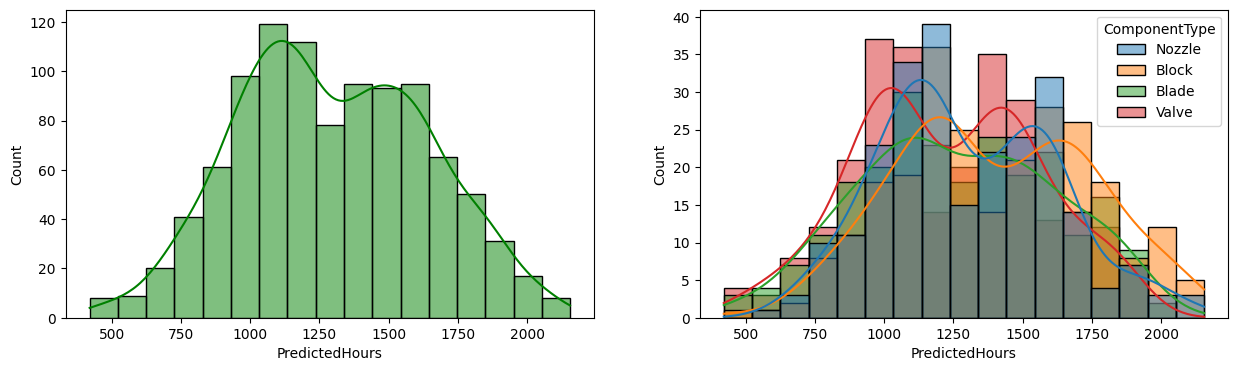

In [50]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=dataset,x='PredictedHours', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=dataset,x='PredictedHours', hue='ComponentType', kde=True)
plt.show()

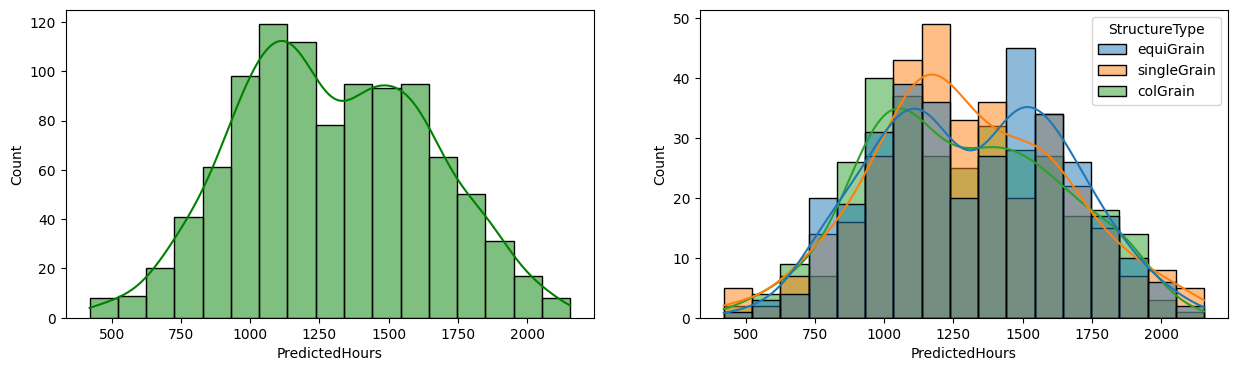

In [57]:
fig, axs = plt.subplots(1,2, figsize=(15, 4))
plt.subplot(121)
sns.histplot(data=dataset, x='PredictedHours', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=dataset, x='PredictedHours', hue='StructureType', kde=True)
plt.show()

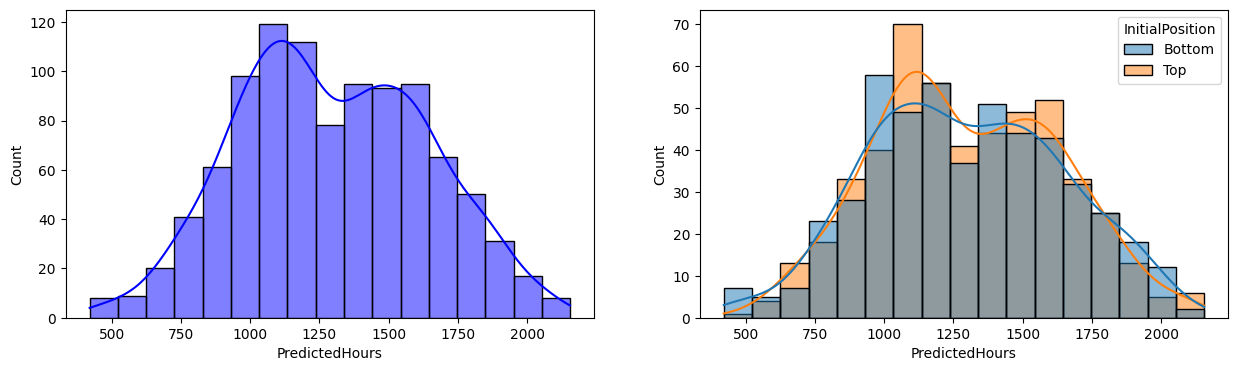

In [61]:
fig, axs = plt.subplots(1,2, figsize=(15,4))
plt.subplot(121)
sns.histplot(data=dataset, x='PredictedHours', kde=True, color='b')
plt.subplot(122)
sns.histplot(data=dataset, x='PredictedHours', hue='InitialPosition', kde=True)
plt.show()

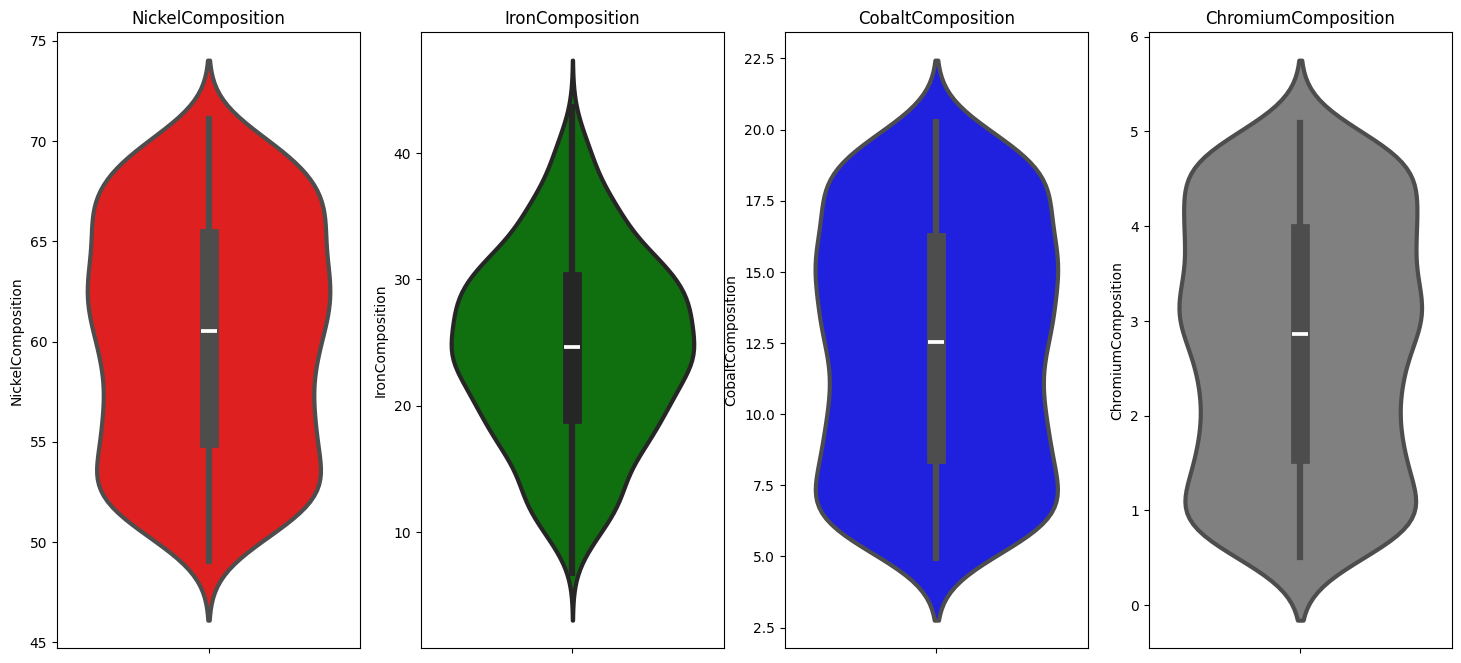

In [67]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('NickelComposition')
sns.violinplot(y='NickelComposition',data=dataset,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('IronComposition')
sns.violinplot(y='IronComposition', data=dataset, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('CobaltComposition')
sns.violinplot(y='CobaltComposition', data=dataset, color='blue', linewidth=3)
plt.subplot(1,4,4)
plt.title('ChromiumComposition')
sns.violinplot(y='ChromiumComposition', data=dataset, color='grey', linewidth=3)
plt.show()